In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_heart = pd.read_csv('./data/heart_attack_dataset_vietnamese.csv')
df_heart.head()

,Tuổi,Giới tính,Cholesterol,Huyết áp,Nhịp tim,Chỉ số BMI,Hút thuốc,Tiểu đường,Cao huyết áp,Tiền sử gia đình,...,Cơn đau thắt ngực do tập thể dục,Độ dốc của ST segment,Số lượng mạch máu chính,Bệnh Thalassemia,Tiền sử đau tim,Tiền sử đột quỵ,Khu vực sinh sống,Tình trạng việc làm,Tình trạng hôn nhân,Kết quả
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [3]:
for column in df_heart.columns:
    unique_values = df_heart[column].unique()
    print(f"Cột '{column}' có các giá trị khác nhau: {unique_values}")


Cột 'Tuổi' có các giá trị khác nhau: [31 69 34 53 57 41 45 61 30 84 36 35 38 37 32 82 76 49 79 48 80 42 52 74
 73 81 72 78 55 54 60 50 71 33 75 68 44 77 65 66 67 63 70 62 51 43 59 46
 64 83 56 40 47 39 58]
Cột 'Giới tính' có các giá trị khác nhau: ['Male' 'Female']
Cột 'Cholesterol' có các giá trị khác nhau: [194 208 132 268 203 158 237 218 216 143 151 168 249 230 172 193 113 145
 278 155 131 209 251 157 206 215 293 154 219 102 273 124 115 291 288 236
 299 260 282 117 257 159 179 239 175 184 283 281 169 212 298 103 266 224
 174 265 188 142 126 220 187 247 178 254 225 170 191 270 240 148 177 152
 286 101 171 190 211 125 107 161 261 253 245 114 130 267 246 182 105 292
 138 122 201 186 272 255 144 108 119 242 121 156 256 221 204 120 189 118
 109 166 285 289 199 297 200 238 140 139 123 106 277 150 275 181 180 250
 153 259 233 284 287 198 229 232 280 134 264 110 141 147 162 149 226 235
 116 207 271 222 227 100 176 129 165 146 183 217 258 127 223 167 197 160
 263 276 137 228 269 163 135 252 

Câu 1: Giữa nam và nữ thì bên nào có tỷ lệ mắc bệnh cao hơn

In [4]:
heart_attack_counts = df_heart[df_heart['Kết quả'] == 'Heart Attack']['Giới tính'].value_counts()
total_counts = df_heart['Giới tính'].value_counts()
heart_attack_rate = (heart_attack_counts / total_counts) * 100
print("Tỷ lệ mắc bệnh tim theo giới tính:\n", heart_attack_rate)

Tỷ lệ mắc bệnh tim theo giới tính:
 Giới tính
Female    50.048871
Male      49.859721
Name: count, dtype: float64


In [5]:
numeric_col = df_heart.select_dtypes('number').columns
numeric_col

Index(['Tuổi', 'Cholesterol', 'Huyết áp', 'Nhịp tim', 'Chỉ số BMI',
       'Hút thuốc', 'Tiểu đường', 'Cao huyết áp', 'Tiền sử gia đình',
       'Hoạt động thể chất', 'Tiêu thụ rượu bia', 'Mức độ căng thẳng',
       'Thu nhập', 'Nhịp tim tối đa', 'Chỉ số ST Depression',
       'Số lượng mạch máu chính', 'Tiền sử đau tim', 'Tiền sử đột quỵ'],
      dtype='object')

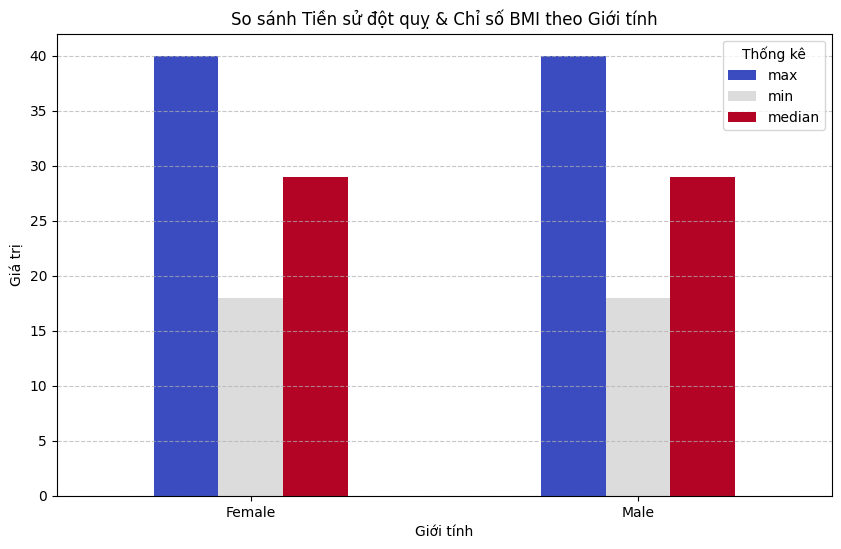

In [6]:
gender_df = df_heart.groupby('Giới tính')[['Tiền sử đột quỵ', 'Chỉ số BMI']].agg(['max', 'min', 'median'])
gender_df



# Vẽ biểu đồ cột
gender_df['Chỉ số BMI'].plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

# Thêm tiêu đề và nhãn
plt.title("So sánh Tiền sử đột quỵ & Chỉ số BMI theo Giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Giá trị")
plt.xticks(rotation=0)  # Giữ nhãn trục x ngang
plt.legend(title="Thống kê")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()


199.0


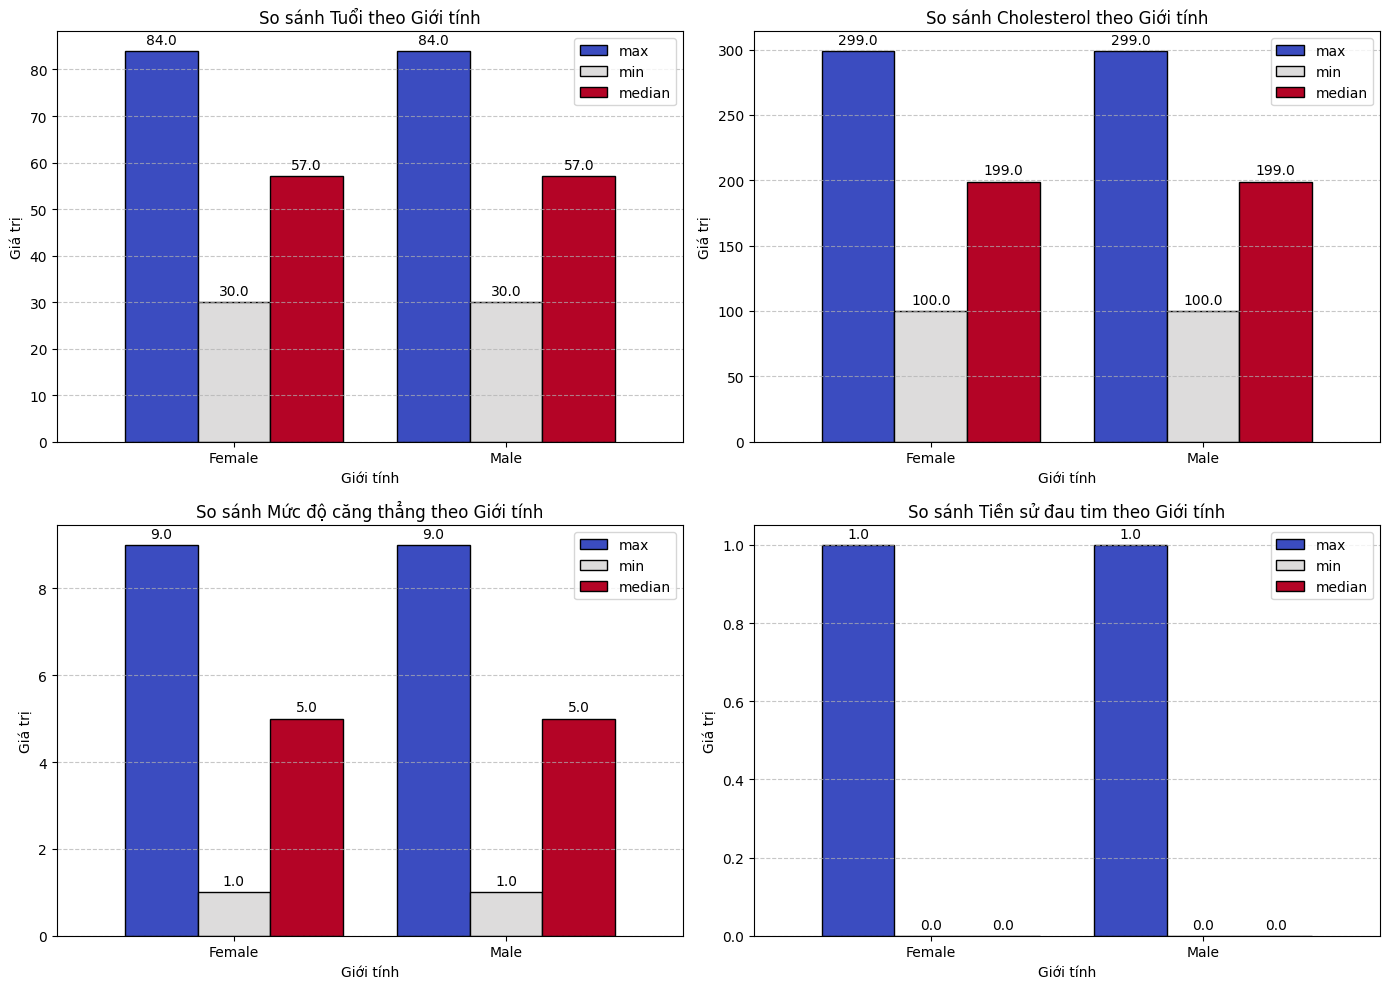

In [7]:

a = df_heart[df_heart['Giới tính'] == 'Male']['Cholesterol'].median()
print(a)
gender_df = df_heart.groupby('Giới tính')[['Tuổi', 'Cholesterol', 'Mức độ căng thẳng', 'Tiền sử đau tim']].agg(['max', 'min', 'median'])
# gender_df


# Tạo 4 subplot (2 hàng, 2 cột)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Chuyển mảng 2D thành mảng 1D để dễ truy cập
axes = axes.flatten()  

# Lặp qua từng cột để vẽ biểu đồ riêng
for i, col in enumerate(gender_df.columns.levels[0]):  
    ax = axes[i]  # Chọn subplot tương ứng
    
    # Vẽ biểu đồ cột
    gender_df[col].plot(kind='bar', ax=ax, colormap='coolwarm', width=0.8, edgecolor='black')
    
    # Thêm giá trị lên cột
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", fontsize=10, padding=3)
    
    # Thiết lập tiêu đề và nhãn
    ax.set_title(f"So sánh {col} theo Giới tính", fontsize=12)
    ax.set_xlabel("Giới tính")
    ax.set_ylabel("Giá trị")
    ax.set_xticks(range(len(gender_df)))
    ax.set_xticklabels(gender_df.index, rotation=0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Căn chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()



          Không mắc bệnh  Mắc bệnh
Dân tộc                           
Asian              37511     37431
Black              37140     37392
Hispanic           37324     37026
Other              37015     37166
White              37326     37643


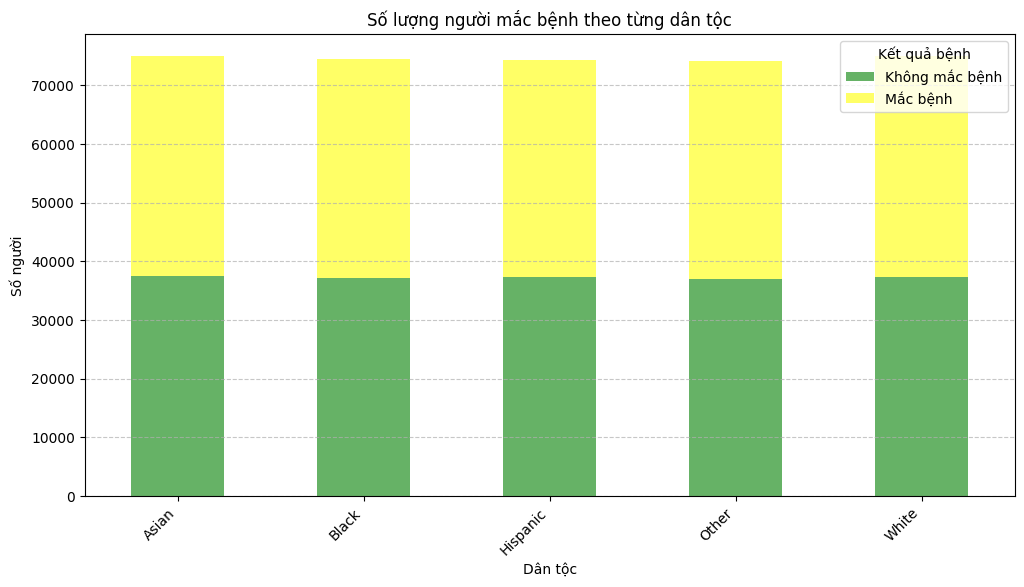

In [8]:
import matplotlib.pyplot as plt

# Đếm số người mắc bệnh và không mắc bệnh theo dân tộc
ethnicity_counts = df_heart.groupby(['Dân tộc', 'Kết quả']).size().unstack()

# Đổi tên cột để dễ hiểu
ethnicity_counts.columns = ["Không mắc bệnh", "Mắc bệnh"]

# Hiển thị bảng dữ liệu
print(ethnicity_counts)

# Vẽ biểu đồ với màu sắc tùy chỉnh
ethnicity_counts.plot(kind="bar", stacked=True, figsize=(12, 6), 
                      color=["green", "yellow"], alpha=0.6)  # Xanh và Vàng

# Thêm tiêu đề và nhãn
plt.title("Số lượng người mắc bệnh theo từng dân tộc")
plt.xlabel("Dân tộc")
plt.ylabel("Số người")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kết quả bệnh")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Lưu hình ảnh
plt.savefig('Ty_le_mac_benh.png', format='png')

# Hiển thị biểu đồ
plt.show()


Nhận xét biểu đồ: 

Tổng số người ở mỗi màu da đều như nhau.(cùng đều hơn 70000) và không chênh lệch nhau quá nhiều 

Tỷ lệ mắc bệnh cũng như nhau ở mỗi màu da. 

Dữ liệu của tác giả rất chỉnh chu thu nhập các dữ liệu không chênh nhau quá nhiều. 

Trong xã hội hiện nay, chi phí khám chữa bệnh cũng là 1 vấn đề quan trọng. Thu nhập cao thì chi phí cho sức khoẻ cũng cao. Vì vậy chúng ta cùng xem thử thu nhập có sự chêch lệch hay không ? Ở đây chúng ta xét trong lứa tuổi lao động thường là 18 – 60 tuổi 

Tổng số người Asian: 74942
Số người mắc bệnh: 37431 (49.95%)
Số người không mắc bệnh: 37511


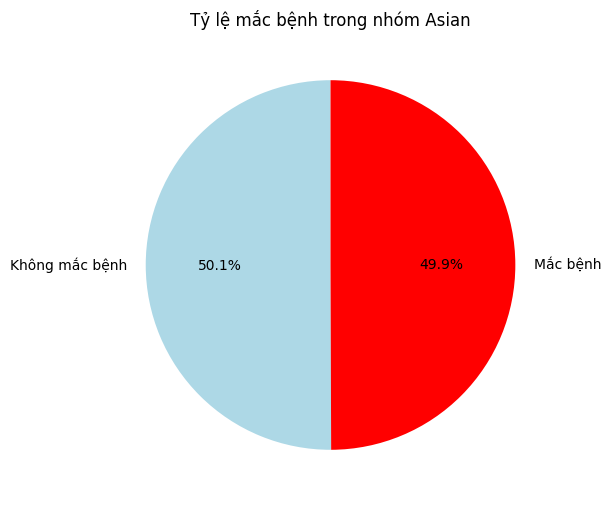

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df_heart có cột 'Dân tộc' và 'Kết quả'
df_asian = df_heart[df_heart['Dân tộc'] == 'Asian']

# Đếm số người mắc bệnh và không mắc bệnh trong nhóm Asian
asian_counts = df_asian['Kết quả'].value_counts()
asian_counts.index = ["Không mắc bệnh", "Mắc bệnh"]

# Tính tỷ lệ mắc bệnh
total_asian = len(df_asian)
percent_infected = (asian_counts["Mắc bệnh"] / total_asian) * 100

# Hiển thị thông tin
print(f"Tổng số người Asian: {total_asian}")
print(f"Số người mắc bệnh: {asian_counts['Mắc bệnh']} ({percent_infected:.2f}%)")
print(f"Số người không mắc bệnh: {asian_counts['Không mắc bệnh']}")

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
asian_counts.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "red"], startangle=90)
plt.title("Tỷ lệ mắc bệnh trong nhóm Asian")
plt.ylabel("")  # Ẩn nhãn y-axis
plt.show()



In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính các giá trị thống kê về thu nhập theo từng dân tộc
income_stats = df_heart.groupby("Dân tộc")["Thu nhập"].agg(["mean", "median", "min", "max"])

# Đổi tên cột cho dễ đọc
income_stats.columns = ["Trung bình", "Trung vị", "Thấp nhất", "Cao nhất"]

# Hiển thị dữ liệu
print(income_stats)


             Trung bình  Trung vị  Thấp nhất  Cao nhất
Dân tộc                                               
Asian     109670.680460  109509.0      20001    199997
Black     109835.348615  109796.0      20000    199994
Hispanic  110214.439610  110537.5      20002    199997
Other     110141.333104  110176.0      20002    199999
White     110306.591725  110475.0      20005    199999


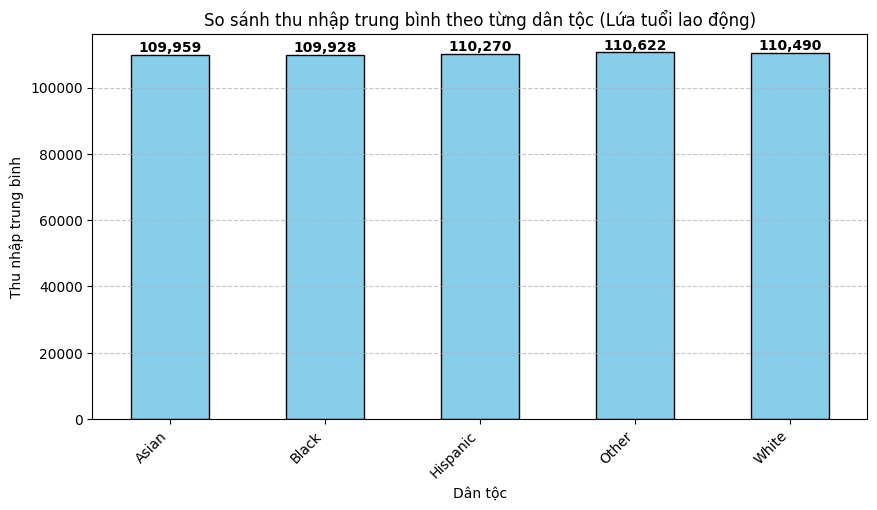

In [11]:
import matplotlib.pyplot as plt

# Lọc dữ liệu chỉ lấy nhóm tuổi lao động (18 - 60 tuổi)
df_labor_force = df_heart[(df_heart["Tuổi"] >= 18) & (df_heart["Tuổi"] <= 40)]

# Tính thu nhập trung bình theo dân tộc trong nhóm lao động
income_stats = df_labor_force.groupby("Dân tộc")["Thu nhập"].mean()

plt.figure(figsize=(10, 5))

# Vẽ biểu đồ cột thu nhập trung bình theo dân tộc
bars = income_stats.plot(kind="bar", color="skyblue", edgecolor="black")

# Thêm giá trị lên mỗi cột
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Vị trí x
        bar.get_height(),  # Vị trí y (chiều cao của cột)
        f"{bar.get_height():,.0f}",  # Giá trị làm tròn đến số nguyên
        ha="center", va="bottom", fontsize=10, fontweight="bold"
    )

# Thêm tiêu đề và nhãn trục
plt.title("So sánh thu nhập trung bình theo từng dân tộc (Lứa tuổi lao động)")
plt.xlabel("Dân tộc")
plt.ylabel("Thu nhập trung bình")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Lưu hình ảnh
plt.savefig("Thu_nhap_dan_toc_lao_dong.png", format="png")

# Hiển thị biểu đồ
plt.show()


Thu nhập trung bình khá đồng đều giữa các dân tộc 

Các nhóm dân tộc có mức thu nhập dao động xung quanh 109,928 - 110,622, cho thấy sự chênh lệch không đáng kể. 

Nhóm “Other” (khác) có thu nhập trung bình cao nhất (110,622), nhưng chênh lệch với nhóm thấp nhất chỉ khoảng 700 USD. 

Không có sự khác biệt rõ rệt lắm giữa các nhưng đâu đó vẫn có sự khác nhau giữa người châu Á và người da đen so với người da trắng và 2 nhóm còn lại. Điều đó cho thấy rằng đâu đó vẫn còn bất công diễn ra. 

Chúng ta tiếp tục xem xét ở nam hay nữ thu nhập có chêch lệch quá lớn không ? 

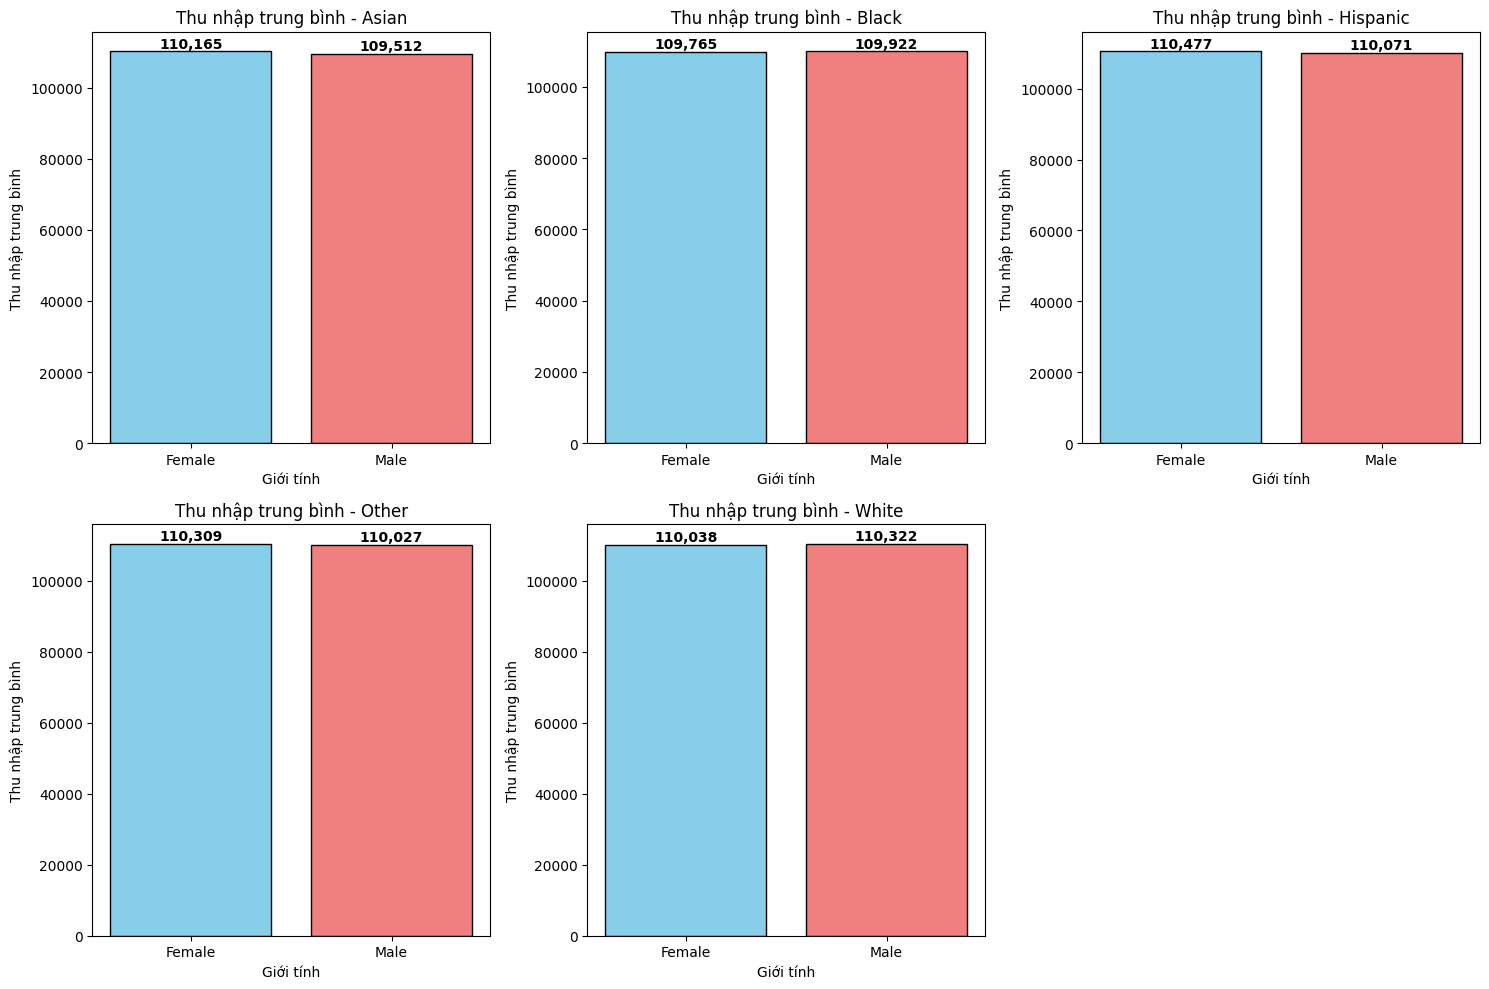

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Lọc dữ liệu chỉ lấy những người trong độ tuổi lao động (18-65 tuổi)
df_labour = df_heart[(df_heart['Tuổi'] >= 18) & (df_heart['Tuổi'] <= 60)]

# Tính thu nhập trung bình theo dân tộc và giới tính
income_stats = df_labour.groupby(['Dân tộc', 'Giới tính'])['Thu nhập'].mean().unstack()

# Danh sách dân tộc để vẽ từng biểu đồ riêng lẻ
ethnic_groups = income_stats.index.tolist()

# Tạo figure với 5 subplots (3 hàng trên, 2 hàng dưới)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 hàng, 3 cột

# Vẽ từng biểu đồ riêng cho mỗi dân tộc
for idx, ethnicity in enumerate(ethnic_groups):
    row = idx // 3  # Xác định hàng (0 hoặc 1)
    col = idx % 3   # Xác định cột (0, 1, 2)
    
    # Lấy dữ liệu của dân tộc đó
    data = income_stats.loc[ethnicity]
    
    # Vẽ cột
    axes[row, col].bar(data.index, data.values, color=['skyblue', 'lightcoral'], edgecolor="black")
    
    # Thêm tiêu đề riêng cho từng dân tộc
    axes[row, col].set_title(f"Thu nhập trung bình - {ethnicity}")
    
    # Thêm nhãn trục
    axes[row, col].set_xlabel("Giới tính")
    axes[row, col].set_ylabel("Thu nhập trung bình")
    
    # Hiển thị giá trị trên cột
    for i, value in enumerate(data):
        axes[row, col].text(i, value + 1000, f"{int(value):,}", ha='center', fontsize=10, fontweight='bold')

# Xóa subplot thừa (nếu số dân tộc < 6)
if len(ethnic_groups) < 6:
    fig.delaxes(axes[1, 2])  # Xóa ô trống ở hàng thứ 2, cột thứ 3

# Căn chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Lưu hình ảnh
plt.savefig('Thu_nhap_dan_toc_gioi_tinh_subplots.png', format='png')

# Hiển thị biểu đồ
plt.show()


Chênh lệch thu nhập giữa nam và nữ không quá lớn: 

Ở hầu hết các nhóm dân tộc, thu nhập trung bình của nam và nữ khá cân bằng, không có sự chênh lệch đáng kể. 

Ví dụ: 

Asian: Nữ (110,165) vs. Nam (109,512) → Nữ có thu nhập cao hơn một chút. 

White: Nữ (110,038) vs. Nam (110,322) → Nam có thu nhập cao hơn một chút. 

Không có xu hướng rõ ràng giữa giới tính và thu nhập: 

Một số dân tộc có thu nhập nữ cao hơn (ví dụ: Hispanic, Other, Asian). 

Một số khác thì nam cao hơn một chút (White, Black). 

Kết luận: 

Điều này có thể phản ánh mức độ đồng đều về cơ hội việc làm giữa hai giới trong độ tuổi lao động. 

Sự khác biệt giữa các dân tộc cũng không rõ rệt: 

Thu nhập trung bình dao động quanh 109,000 - 110,500, không có nhóm nào chênh lệch quá lớn so với nhóm khác. 

Dân tộc Hispanic có thu nhập trung bình cao nhất (110,477 ở nữ). 

In [13]:
print(df_heart["Kết quả"].unique())


['No Heart Attack' 'Heart Attack']


In [14]:
df_heart["Kết quả"] = df_heart["Kết quả"].map({"Heart Attack": 1, "No Heart Attack": 0})
df_heart['Kết quả']

0         0
1         0
2         1
3         0
4         1
         ..
372969    0
372970    1
372971    1
372972    0
372973    1
Name: Kết quả, Length: 372974, dtype: int64

In [15]:
# Xác định nhóm tuổi
under_working_age = df_heart[df_heart["Tuổi"] < 18]  # Dưới tuổi lao động
working_age = df_heart[(df_heart["Tuổi"] >= 18) & (df_heart["Tuổi"] <= 60)]  # Trong tuổi lao động
over_working_age = df_heart[df_heart["Tuổi"] > 60]  # Trên tuổi lao động
over_working_age

,Tuổi,Giới tính,Cholesterol,Huyết áp,Nhịp tim,Chỉ số BMI,Hút thuốc,Tiểu đường,Cao huyết áp,Tiền sử gia đình,...,Cơn đau thắt ngực do tập thể dục,Độ dốc của ST segment,Số lượng mạch máu chính,Bệnh Thalassemia,Tiền sử đau tim,Tiền sử đột quỵ,Khu vực sinh sống,Tình trạng việc làm,Tình trạng hôn nhân,Kết quả
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,0
7,61,Female,218,113,115,23.1,0,1,0,1,...,Yes,Downsloping,1,Fixed defect,1,0,Suburban,Unemployed,Widowed,0
11,84,Male,168,144,92,22.9,0,0,0,1,...,Yes,Flat,0,Fixed defect,1,1,Rural,Unemployed,Widowed,0
18,82,Female,278,123,88,24.6,0,0,1,1,...,No,Flat,3,Fixed defect,1,1,Urban,Employed,Widowed,1
20,76,Male,131,167,106,22.1,0,1,0,1,...,No,Upsloping,3,Reversible defect,0,1,Rural,Retired,Divorced,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372962,75,Female,152,143,64,19.7,1,0,0,1,...,No,Downsloping,2,Reversible defect,0,1,Suburban,Unemployed,Single,1
372967,71,Female,284,143,91,36.8,0,1,1,1,...,No,Upsloping,3,Fixed defect,0,1,Suburban,Retired,Divorced,1
372970,77,Male,197,159,64,33.5,0,1,0,1,...,No,Downsloping,3,Fixed defect,0,1,Urban,Employed,Married,1
372972,78,Female,291,93,78,29.3,1,1,0,1,...,Yes,Upsloping,1,Fixed defect,0,0,Urban,Employed,Married,0


In [16]:
def calculate_disease_ratio(df, title):
    if df.empty:
        print(f"Không có dữ liệu cho nhóm {title}")
        return
    
    total = len(df)
    diseased = df["Kết quả"].sum()
    ratio = diseased / total * 100  # Chuyển thành %

    print(f"Tỷ lệ mắc bệnh ({title}): {ratio:.2f}% ({diseased}/{total})")

# Tính tỷ lệ mắc bệnh theo từng nhóm tuổi
calculate_disease_ratio(under_working_age, "Dưới tuổi lao động")
calculate_disease_ratio(working_age, "Trong tuổi lao động")
calculate_disease_ratio(over_working_age, "Trên tuổi lao động")


Không có dữ liệu cho nhóm Dưới tuổi lao động
Tỷ lệ mắc bệnh (Trong tuổi lao động): 49.99% (105219/210473)
Tỷ lệ mắc bệnh (Trên tuổi lao động): 49.91% (81097/162501)


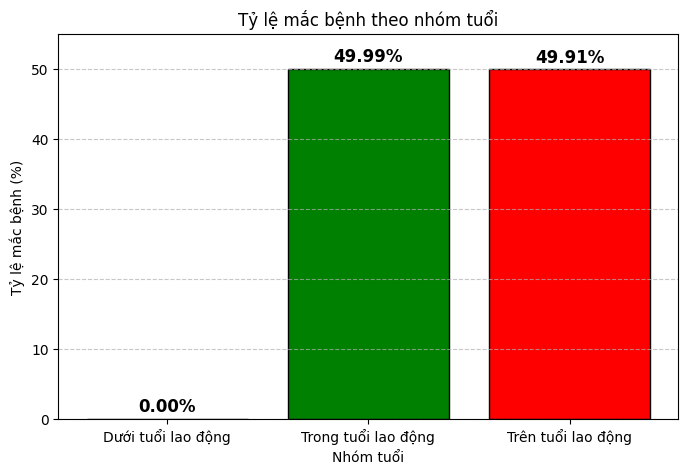

In [18]:
under_working_age = under_working_age.dropna(subset=["Kết quả"])
working_age = working_age.dropna(subset=["Kết quả"])
over_working_age = over_working_age.dropna(subset=["Kết quả"])


age_groups = ["Dưới tuổi lao động", "Trong tuổi lao động", "Trên tuổi lao động"]
ratios = [
    under_working_age["Kết quả"].mean() * 100,
    working_age["Kết quả"].mean() * 100,
    over_working_age["Kết quả"].mean() * 100
]

ratios = [0 if np.isnan(r) or np.isinf(r) else r for r in ratios]


plt.figure(figsize=(8, 5))
plt.bar(age_groups, ratios, color=["blue", "green", "red"], edgecolor="black")

# Thêm giá trị trên cột
for i, v in enumerate(ratios):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold")

plt.title("Tỷ lệ mắc bệnh theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ mắc bệnh (%)")
plt.ylim(0, max(ratios) + 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Nhận xét: 

Tỷ lệ mắc bệnh giữa hai nhóm tuổi gần như tương đương, chỉ chênh lệch rất nhỏ (0.08%), cho thấy không có sự khác biệt đáng kể về tỷ lệ mắc bệnh giữa hai nhóm. 

Cả hai nhóm đều có tỷ lệ mắc bệnh khá cao (~50%), cho thấy bệnh có thể ảnh hưởng rộng rãi đến cả hai nhóm tuổi mà không có sự chênh lệch đáng kể. 

Với đối tượng trong lao động thì chúng ta tiến hành phân tích các nguyên nhân chủ yếu như  cholesterol, huyết áp, nhịp tim, hoạt động thể chất, nhịp tim tối đa. 

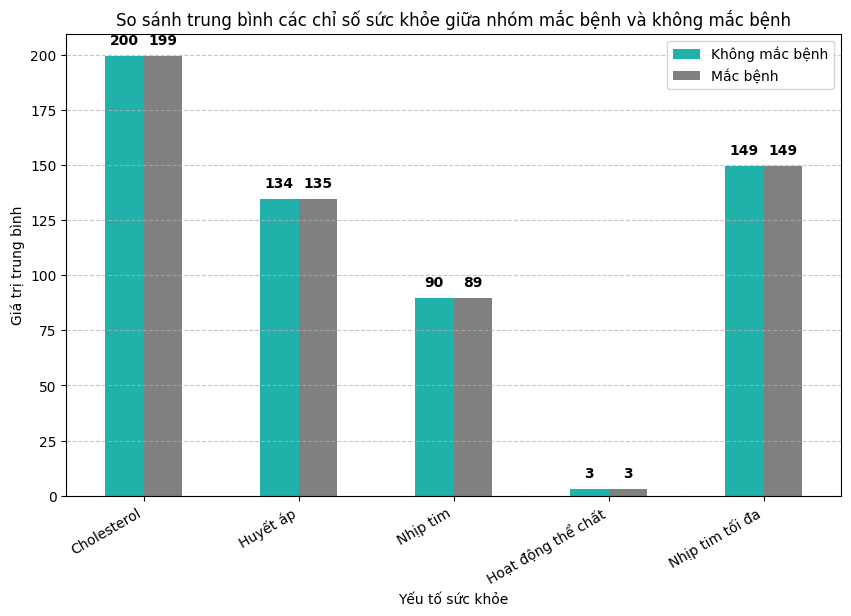

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Danh sách các cột cần so sánh

columns_to_compare = ["Cholesterol", "Huyết áp", "Nhịp tim", "Hoạt động thể chất", "Nhịp tim tối đa"]

# Tính trung bình theo nhóm bệnh
df_grouped = df_heart.groupby("Kết quả")[columns_to_compare].mean()

# Vẽ biểu đồ
ax = df_grouped.T.plot(kind="bar", figsize=(10, 6), color=["lightseagreen", "gray"])

# Thêm giá trị trên cột
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  
            height + max(df_grouped.max().max() * 0.02, 2),  
            f"{height:.0f}",  
            ha="center", va="bottom", fontsize=10, fontweight="bold"
        )

# Căn chỉnh đồ thị
plt.title("So sánh trung bình các chỉ số sức khỏe giữa nhóm mắc bệnh và không mắc bệnh")
plt.xlabel("Yếu tố sức khỏe")
plt.ylabel("Giá trị trung bình")
plt.xticks(rotation=30, ha="right")  # Xoay nhãn trục X
plt.legend(["Không mắc bệnh", "Mắc bệnh"])
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Thêm lưới ngang

plt.show()


Nhận xét biểu đồ: 

Các thuộc tính có vẻ khá câng bằng với nhau nhưng vẫn có sự chênh lệch ở cột nhịp tim và nhịp tim tối đa, dù chỉ chênh lệch không lớn. Điều đó thể hiện nhịp tim khi bị bệnh sẽ có xu hướng cao hơn lúc không bị bệnh. Những người có hoạt động thể chất cao thì thường có nhịp tim giảm nhưng sức khoẻ lại cao hơn so với những người bị bệnh. Vì tim của họ đã được rèn luyện trong 1 thời gian dài nên đã trở nên khoẻ hơn, tuy đập ít hơn nhưng vẫn cung cấp đủ lượng oxi và  chất dinh dưỡng mà cơ thể cần.  

Kết luận: Qua biểu đồ ta thấy được dù có bi bệnh hay không nhưng nếu ta luyện tập 1 cách chừng mực, hợp lý, thì sức khoẻ sẽ tăng lên 1 cách đáng kể.  